In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ticker_symbol = "GC=F"

In [12]:
print(f"Downloading {ticker_symbol}...")
gold_data = yf.download(ticker_symbol, start="2015-01-01", end="2025-12-31")

[*********************100%***********************]  1 of 1 completed


In [13]:
print(gold_data.head())

Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2015-01-02  1186.000000  1194.500000  1169.500000  1184.000000    138
2015-01-05  1203.900024  1206.900024  1180.099976  1180.300049    470
2015-01-06  1219.300049  1220.000000  1203.500000  1203.500000     97
2015-01-07  1210.599976  1219.199951  1210.599976  1219.199951     29
2015-01-08  1208.400024  1215.699951  1206.300049  1207.000000     92


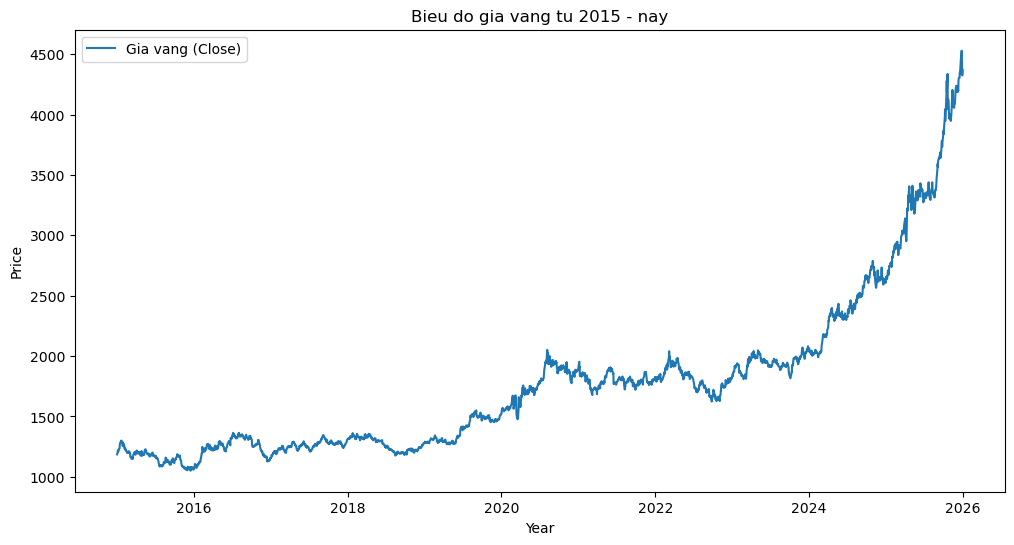

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gia vang (Close)')
plt.title("Bieu do gia vang tu 2015 - nay")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()